# DatFys Examproject, oscillators
## Thea Johansen, ZLV317
Beware when running this all at once, later there will be some hefty function that will take so long to finish, I spent around 10 minutes running the whole script once.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp as solve

# Question 1
For this question we will be working with simple oscillators and solving Ordinary Differential Equations (ODEs).
## 1.a
We are intially interested in writing a program that solves OEDs using the Euler scheme, we will be looking at two differential equations:
$$ \frac{dx}{dt} = v $$
$$ \frac{dv}{dt} = -\omega^2 x $$
Where $\omega$is the angular frequency of our oscillator.
The two ODEs come from the generic oscillator equations, namely:
$$ \frac{d^2x}{dt^2} = -\omega^2 x $$

### Part 1
First of all we want to define the problem we are working with this time around, we have the initial conditions:
$$x_0 = 1 m, v_0 = 0 \frac{m}{s}$$
And the constant:
$$\omega = 1 \frac{1}{s}$$
And we will be working in the timerange 0 to 50 seconds

We start by defining our ODEs as a function that takes values for x and v and returns our ODEs, we call this SimpleHarOsc (for simple harmonic ocillator) and it is pretty simple to define:

In [2]:
def SimpleHarOsc(xv:list, omega = 1) -> (float,float):
    dxdt = xv[1] #dxdt = v
    dvdt = -omega**2 * xv[0] #dvdt = -omega * x
    return dxdt, dvdt

### Part 2
We now want to define the fucntion that does the actual Euler integration.
The Euler scheme requres some number of Euler steps to be completed, one Euler steps looks like this:
$$ x_{n+1} = x_n - f(x_n) * dt $$
Where dt are your timesteps, f(x) is your function, and $x_n$ is the value of the previous Euler step (or the inital condition $x_0$)

Our function will take our initial conditions, our timesteps dt and the max time allowed to pass. Since we are only interested in one of the ODEs, namely the solution for dxdt, we will return that along with an array of timesteps that correspond to when each Euler step was done.

We will call it SimpleEuler, to call back to the Simple Harmonic Oscillator, which will be the only function it can work with.

In [3]:
def SimpleEuler(xv_0:list, dt:float, tmax:float) -> (list,list):
    x_sav = np.array([xv_0[0]])
    time = np.array([0]) #We will save our timesteps and x values here
    xv_n = xv_0
    while time[-1] + dt <= 50: #We run until adding dt pushes the time to excatly 50 seconds
        xv_n1 = xv_n - np.array(SimpleHarOsc(xv_n)) * np.array([dt,dt]) #Euler step for both x and v
        
        x_sav = np.append(x_sav, xv_n1[0])
        time = np.append(time, time[-1] + dt) #Save timestep and x-value
        
        xv_n = xv_n1 #Update our x and v values
        
    return x_sav, time
        

## 1.b
We now want to look at our results in a plot to determine their validity.

### Part 1
We would like to compare results for diffrent dt's, namely 0.1, 0.01 and 0.001, to do this we quickly make a functio that plots our data for some given intial conditions, dt and the name of the variable we are changing (this will be useful later), tmax is at constant 50:

In [4]:
def SimpleVis(xv_0:list, dt:float, name:str, tmax = 50):
    xt = SimpleEuler(xv_0, dt, tmax) #Runts the euler integration
    #Plotting:
    plt.plot(xt[1], xt[0],'.', label = "Solved ODEs with " + name) 
    plt.xlabel("Time [s]")
    plt.ylabel("Position [m]")
    plt.legend(loc = 'lower left');

Wall time: 29.9 ms


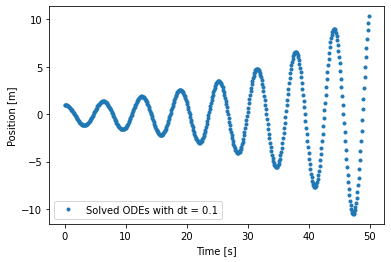

In [5]:
%%time
SimpleVis([1,0], 0.1, "dt = 0.1")

Wall time: 134 ms


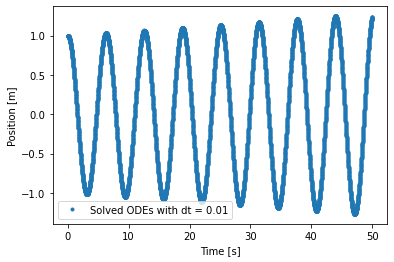

In [6]:
%%time
SimpleVis([1,0], 0.01, "dt = 0.01")

Wall time: 1.62 s


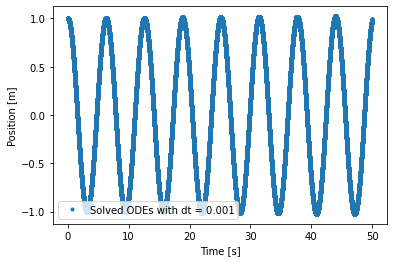

In [7]:
%%time
SimpleVis([1,0], 0.001, "dt = 0.001")

Since we are working with a perfect (no friction, air resistance, etc.) Harmonic Oscillator, there is the expectation that it will continuesly oscillate between -1 and 1 (for these starting conditions), so for the first try with dt = 0.1 to gain height, going so far as to reach 10 and -10, something isnt right, since this isnt even possible physically (where we would expect it to slowly come to a stop as a nearly straight line at x = 0).

It is also noticable that the try for dt = 0.01 also slowly gains in height, which is also wrong, but it does it rather slowly, so for a low tmax, that might be an acceptable error since it takes so much longer to run the most accurate try, which is dt = 0.001.

The dt = 0.001 gave the most correct result, bur for time'ss sake I will use a dt that falls somewhere between 0.01 and 0.001, since 0.001 takes a very long time to run. Going forward i will be using dt = 0.003, which will be more than accurate enough for tmax = 50.

### Part 2
We will now test some different starting positons for x, all in the same plot, here we also use our handy plotting fucntion.

Wall time: 1.13 s


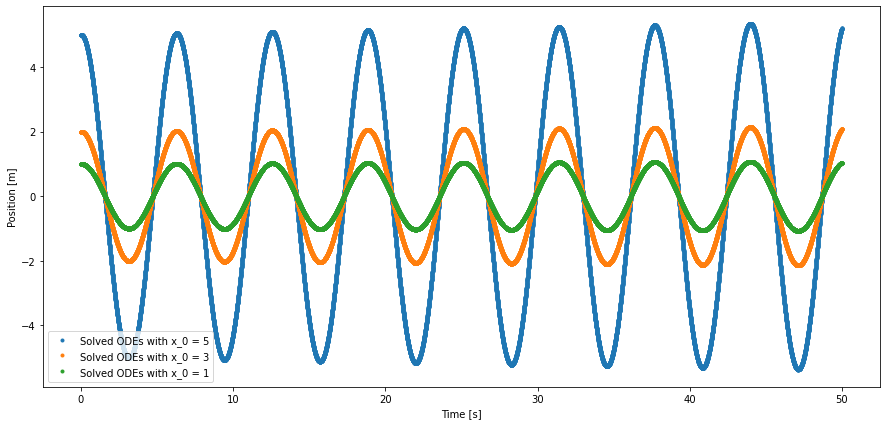

In [8]:
%%time
plt.figure(figsize=(15, 7)) #Plot was too small, so i am resizing it
SimpleVis([5,0], 0.003, "x_0 = 5")
SimpleVis([2,0], 0.003, "x_0 = 3")
SimpleVis([1,0], 0.003, "x_0 = 1")

This is pretty much as expected, as said before, since it is a harmonic oscialltor, it is expected to constantly oscilatte between $x_0$ and $-x_0$ and oscillate with the same periods regardless of x0, which these do beutifully. It also confirms that dt = 0.003 is just fine for tmax = 50, and it took less time to run 3 Euler integrations for dt = 0.003 than it took to run one for dt = 0.001 (1.63 s vs 1.12 s for me).

### Part 3
We could test if the oscillator we have made is truly harmonic (or somewhere close, all depending on the choice of dt) by setting $v_0$ to some non-zero number. It would be the same as starting our simulation in the middle of a swing, so while we would not swing between $x_0$ and $-x_0$ we would stabilize between some other two constant x and -x.



# Question 2
We are now interested in the aharmonic oscillator, defined by the function:
$$\frac{d^2x}{dt^2} = -\omega*x^3$$
And subsequently:
$$\frac{dx}{dt}=v$$
$$\frac{dv}{dt}=-\omega*x^3$$

## 2.a
### Part 1
We want to use Scipy's solve_ivp (I called it solve because it is easier to read that way), to solve our differential equations. We set up some constants right away:
$$v_0 = 0 \frac{m}{s}$$
And the constant:
$$\omega = 1 \frac{1}{s}$$

And we will be working in the timerange 0 to 50 seconds, since we want to compare it to our results from our harmonic oscillator. We will be working with timesteps below or eaqual to 0.001 s.

So lets first set up a function that we can feed to solve, and also a function that runs the solve command.


In [9]:
def AharOsc(time:float,xv:list, omega = 1) -> (float,float):
    dxdt = xv[1] #dxdt = v
    dvdt = -omega * xv[0]**3 #dvdt = -omega*x^3
    return dxdt, dvdt

def SolveAharOsc(x0:float, dtmax = 0.001,tmax=50, v0 = 0) -> (list, list,list):
    sol = solve(AharOsc, [0,tmax], [x0, v0], max_step = dtmax) #solves :) 
    return np.array(sol.t), np.array(sol.y[0]), np.array(sol.y[1]) #returns timesteps, x and v, I'll need them to be np arrays for later

We will now run solveAharOsc for 3 diffrent x0's, 1,2 and 5. We will use our premade visualization function made back in 1.b part 1 as a skeleton to make a new vis function, since we also wish to viasualize the results from this solution.

In [10]:
def AharVis(x0:float, name:str):
    t,x,v = SolveAharOsc(x0) #generate data
    
    #Plotting
    plt.plot(t, x,'.', label = "Solved equations with solve_ivp for " + name, ms = 5) 
    plt.xlabel("Time [s]")
    plt.ylabel("Position [m]")
    plt.legend(loc = 'lower left');

Wall time: 10.5 s


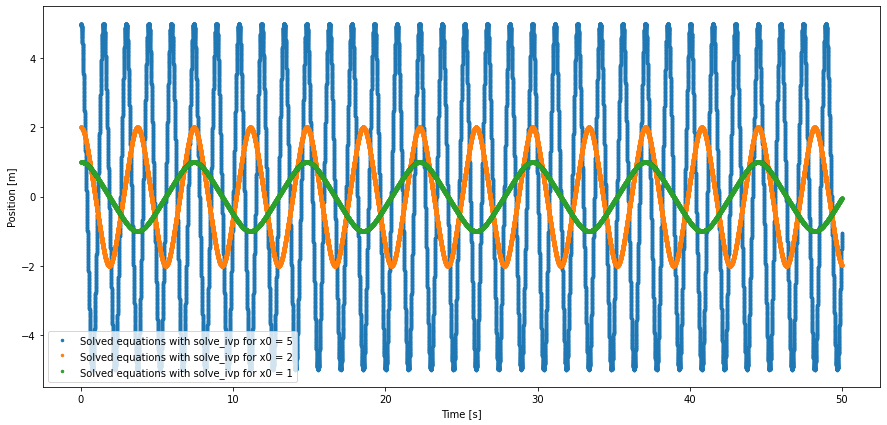

In [11]:
%%time 
#Note, this can take upwards of 11 seconds to run
plt.figure(figsize=(15, 7)) #Plot was too small, so i am resizing it
AharVis(5, "x0 = 5")
AharVis(2, "x0 = 2")
AharVis(1, "x0 = 1")

### Part 2
We compare this plot with the one from 1.b part 2:
Here we can clearly see, that unlike the harmonic oscillator, the aharmonic oscillator does not retain its period for diffrent starting conditions, the period gets shorter for big x0's and long for small x0's. Which makes a lot of sense considering it is aharmonic.

### Part 3
We will now try a few more x0s (A amplitudes) and thier resulting period (T). To find thier period we need to find the times that our oscillator reaches a max value, we can do this with masks, and then find the resulting time points. My plan is then to subtract the time points from oneanother, and find the mean of those numbers (since we arent working with real data i will assume the std is so small that it doesnt matter). 

We make a quick function for this:

In [12]:
def FindPeriods(x0s:list):
    for x0 in x0s: 
        t_full,x,v = SolveAharOsc(x0) #generate data
        
        mask = (x[1:-1] > x[:-2]) & (x[1:-1] > x[2:]) #I make a mask that will isolate top points of a set of data
        t_mask = t_full[1:-1][mask] #I apply this mask to my timesteps, giving me the timepoints in which we reach a top point
        
        t_period = np.diff(t_mask) #I find the difference between each timepoint
        
        print("For x0 = ", str(x0), "m. The period T = ", round(np.mean(t_period),1), "s") #Print
        

We now have a fucntion that will take some amount of x0'ss and return us some nice print statements about the period that results from that x0!

I will try the x0s 1,2,5 to be able to compare it to our graph above, since we can somewhat glimpse the approximation of what the periods might be, this will be a good way to evaulte if our fucntions works as intended.
After I confirm that our function works, I will try the x0s 0.5,7,10,100 for some variation.

In [13]:
#Runs slowly, be patinet
FindPeriods([1,2,5])

For x0 =  1 m. The period T =  7.4 s
For x0 =  2 m. The period T =  3.7 s
For x0 =  5 m. The period T =  1.5 s


Comparing those numbers to what we see above, it is really clear when counting peaks on x0 = 5, since we should expect 7 to have appeared around the 10 second mark (remeber that my method does not count the peak at t = 0), and we do see that. So I assume my method works : )

In [14]:
#Runs slowly, be patinet
FindPeriods([0.5,7,10,100])

For x0 =  0.5 m. The period T =  14.8 s
For x0 =  7 m. The period T =  1.1 s
For x0 =  10 m. The period T =  0.7 s
For x0 =  100 m. The period T =  0.1 s


As expected (and observed before), the period gets smaller the higher x0 is.

## 2.b
We are now interested in making a phase plot, which is a v(x) plot, we will do this for the same x0s as 2.a part 1. We once more make a visualization function, because I am a huge fan of those.

In [15]:
def PhasePlot(x0:float, name:str):
    t,x,v = SolveAharOsc(x0) #Generates data
    
    #Plotting:
    plt.plot(x,v,'.', label = "Phase plot for " + name) 
    plt.xlabel("Position [m]")
    plt.ylabel("Vilocity [m/s]")
    plt.xticks(ticks = [-5,-2,-1,0,1,2,5]) #I make special ticks to make the plot look better
    plt.legend(loc = 'lower left');

Wall time: 10.5 s


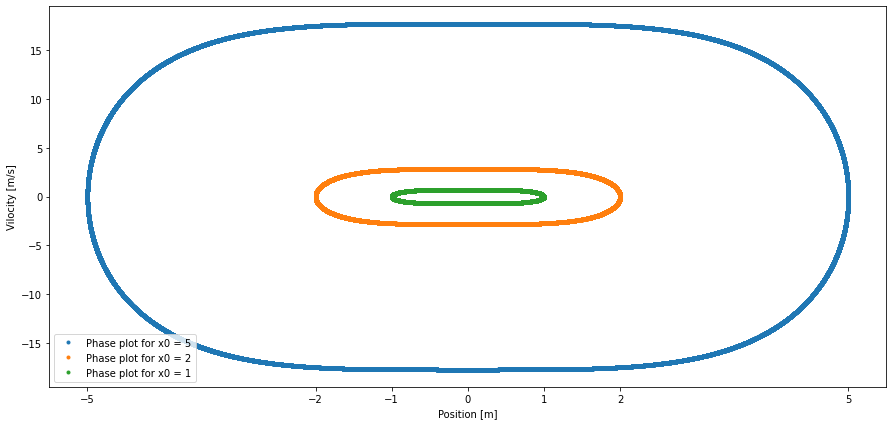

In [16]:
%%time
#Note, this can take upwards of 11 seconds to run
plt.figure(figsize=(15, 7)) #Plot was too small, so i am resizing it
PhasePlot(5, "x0 = 5")
PhasePlot(2, "x0 = 2")
PhasePlot(1, "x0 = 1")

This makes good sense, since the value for the vilocity does go in a somewhat circular motion.

If we look at pendulum for an exsample, we can start the movement in some max position, lets say this is x0 = 5. Then we let go of it, and the vilocity will increase in the negative direction, untill it reaches some max at x = 0, when it will start to decrease to 0 at x = -5. From there it will increase in the positive direction, reach max at x = 0, and then 0 again back at x0. 

So it will cycle as: 0 -> -max -> 0 -> max -> 0 -> -max... etc.

This results in the circular pattern we see on the graph, and naturally the v_max will be smaller for a smaller x0, since it wont have had as much time to accelerate as with larger x0s.

# Question 3
Now we wish to work with a Van der Pol oscillator, described by:
$$\frac{d^2x}{dt^2} + \mu (x^2-1)\frac{dx}{dt}+\omega^2 x = 0$$
And subsequnetly:
$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = -\mu (x^2-1)v-\omega^2 x$$

Where $\mu$ is some positive constant that controls the strength of the dampning term, $(x^2-1)v$.

## 3.a
Here we will use the same constant as we have for 1.b, $\mu = 1$ and the following x0s 1,2,5.

### Part 1 
we want to compare the x(t) and v(x) plot for diffrent x0s for our Van der Pol pscillator, we use solve_ivp to solve this system.

Since we will this time be running our data for a tmax = 1000, we will this time be saving our data to an array so we dont have to rerun our solve function several times, by my calculations, it could take upwards of 2 minutes to solve for the 3 x0s, so we would like to avoid doing that more than neccesary.

In [17]:
def VanPolOsc(time:float, xv:list, omega = 1, mu = 1) -> (float, float):
    dxdt = xv[1] #dxdt = v
    dvdt = -mu*(xv[0]**2-1)*xv[1]-omega**2*xv[0] #dvdt = -mu*(x^2 -1) * v - omega^2 * x
    return dxdt, dvdt

def SolveVanPol(func,x0:float, dtmax = 0.001, tmax = 1000, v0 = 0) -> (list, list,list):
    sol = solve(func, [0,tmax], [x0, v0], max_step = dtmax) #solves :) 
    return np.array(sol.t), np.array(sol.y[0]), np.array(sol.y[1]) #returns timesteps, x and v, I'll need them to be np arrays for later


In [18]:
%%time
#Sit back and relax... this will take a while
x01txv = SolveVanPol(VanPolOsc,1)
x02txv = SolveVanPol(VanPolOsc,2)
x05txv = SolveVanPol(VanPolOsc,5)

Wall time: 3min 50s


It seems I was wrong, it took me 4 mintues to run that.

Now that we have our data we can write a function that visualizes it:

In [19]:
def VisVanPol(txvs:list, names:list, title:str):
    #We want to plot all this as 6 subplots in one big figure
    fig, (ax) = plt.subplots(len(names),2,gridspec_kw={'width_ratios': [2,1]}, figsize = (20, 21)) 
    fig.suptitle(title, fontsize=25)
    
    for i in range(len(names)):
  
        ax[i,0].plot(txvs[i][0], txvs[i][1], 'r.', label = "x(t) plot for " + names[i], ms = 1)
        ax[i,0].set_xlabel("Time [s]")
        ax[i,0].set_ylabel("Position [m]")
        ax[i,0].set_title("x(t) plot")
        ax[i,0].legend(loc = 'lower left');
        
        ax[i,1].plot(txvs[i][1], txvs[i][2], '.', label = "v(x) plot for " + names[i])
        ax[i,1].set_xlabel("Position [m]")
        ax[i,1].set_ylabel("Vilocity [m/s]")
        ax[i,1].set_title("v(x) plot")
        ax[i,1].legend(loc = 'lower left'); 
    


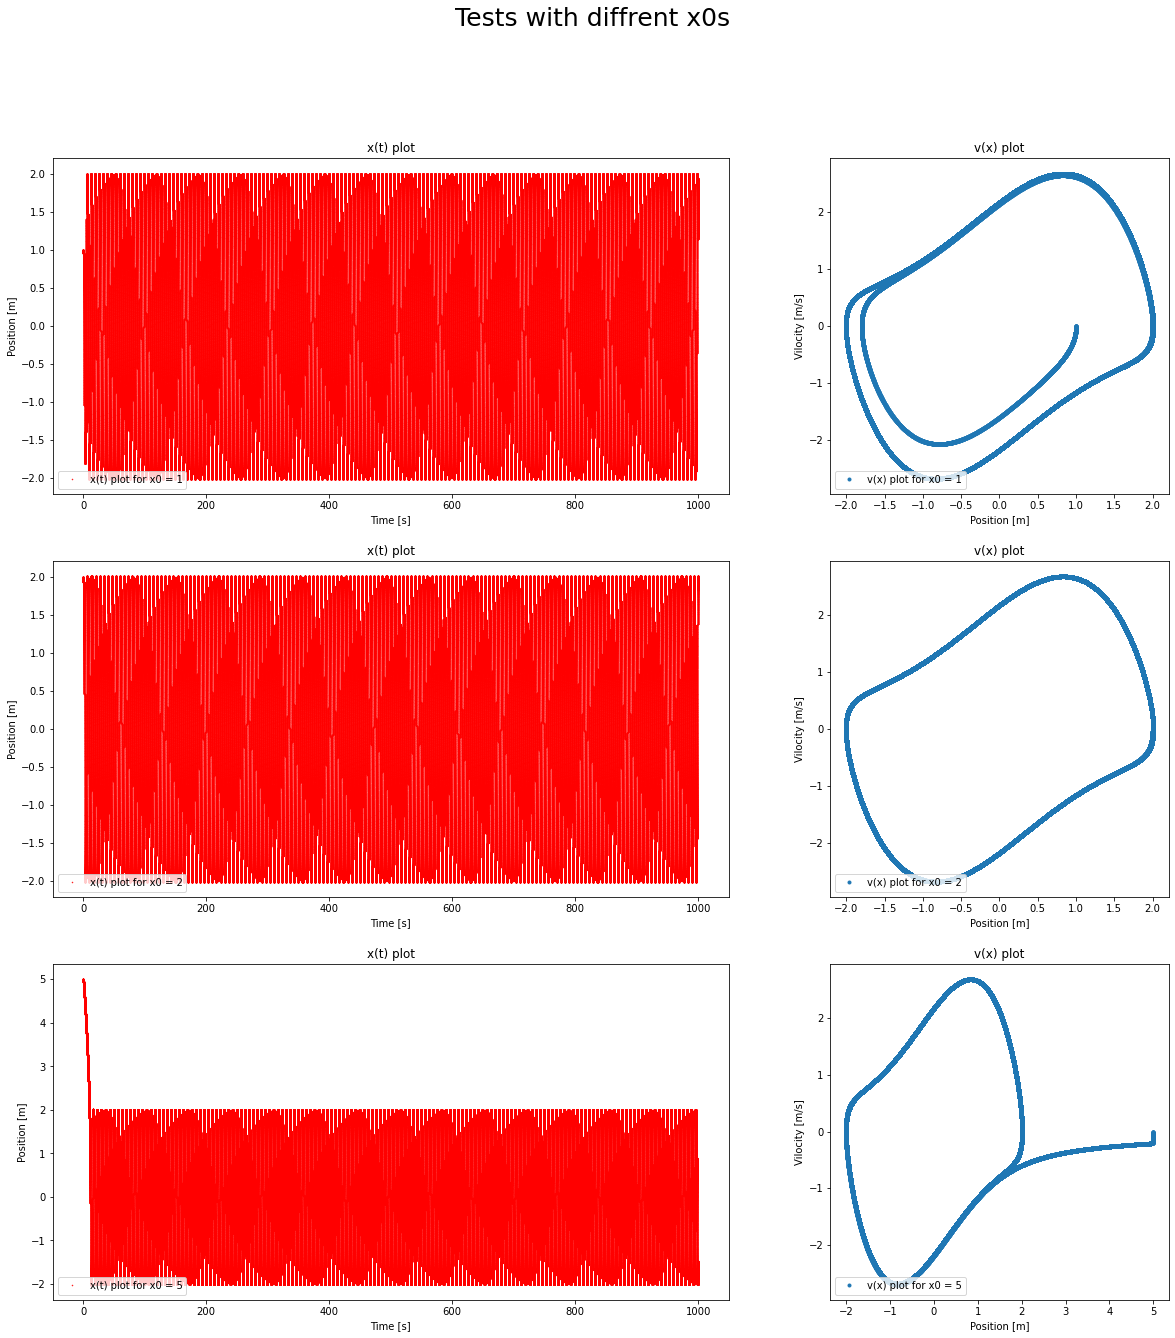

In [20]:
VisVanPol([x01txv,x02txv,x05txv],["x0 = 1","x0 = 2","x0 = 5"], "Tests with diffrent x0s")

### Part 2
This is very messy, so lets make it a bit easier to read by seperating our data into two sections, an early section, which is for t <= 20 and a late section which is for t >= 800. We are disinterested in what is inbetween.

We do this by using masks, after that, we will plot the same plots again and compare them.

In [21]:
def EarLate(txv:list) -> list:
    t,x,v = txv #Makes masks appicable
    txvearly = [t[t<=20],x[t<=20],v[t<=20]] #removes data where t > 20
    txvlate = [t[t>=800],x[t>=800],v[t>=800]] #removes data where t < 800
    return txvearly, txvlate

In [22]:
x01earl, x01late = EarLate(x01txv)
x02earl, x02late = EarLate(x02txv)
x05earl, x05late = EarLate(x05txv)

We have separated them into early and late instances, we will now plot them.

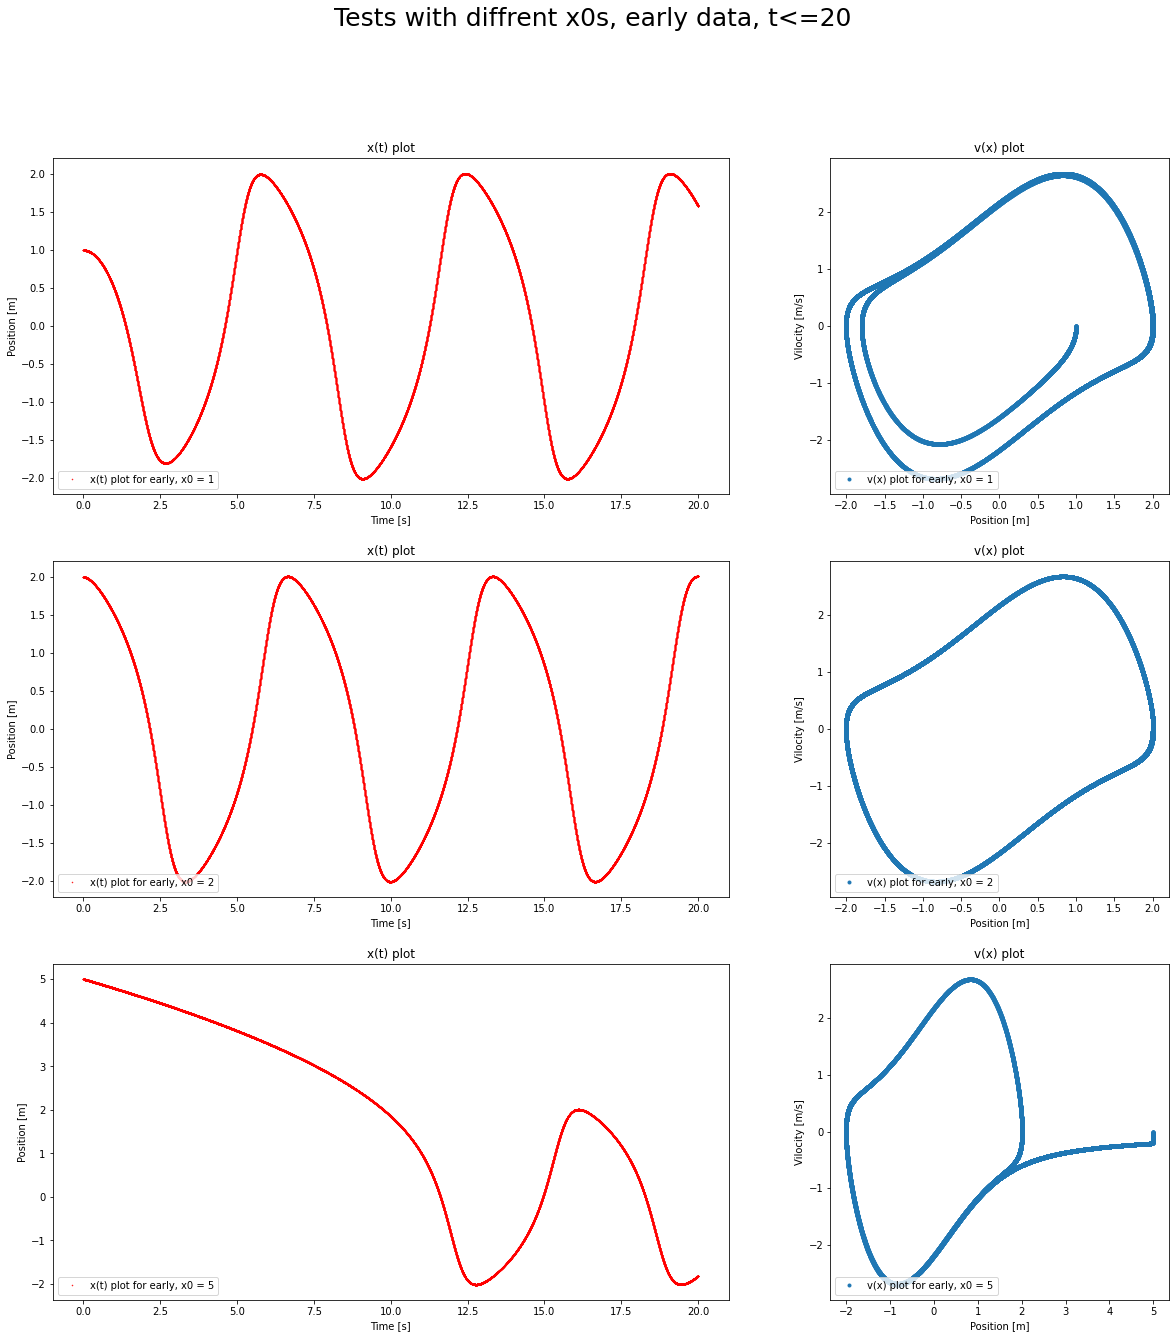

In [23]:
VisVanPol([x01earl,x02earl,x05earl],["early, x0 = 1","early, x0 = 2","early, x0 = 5"],"Tests with diffrent x0s, early data, t<=20")

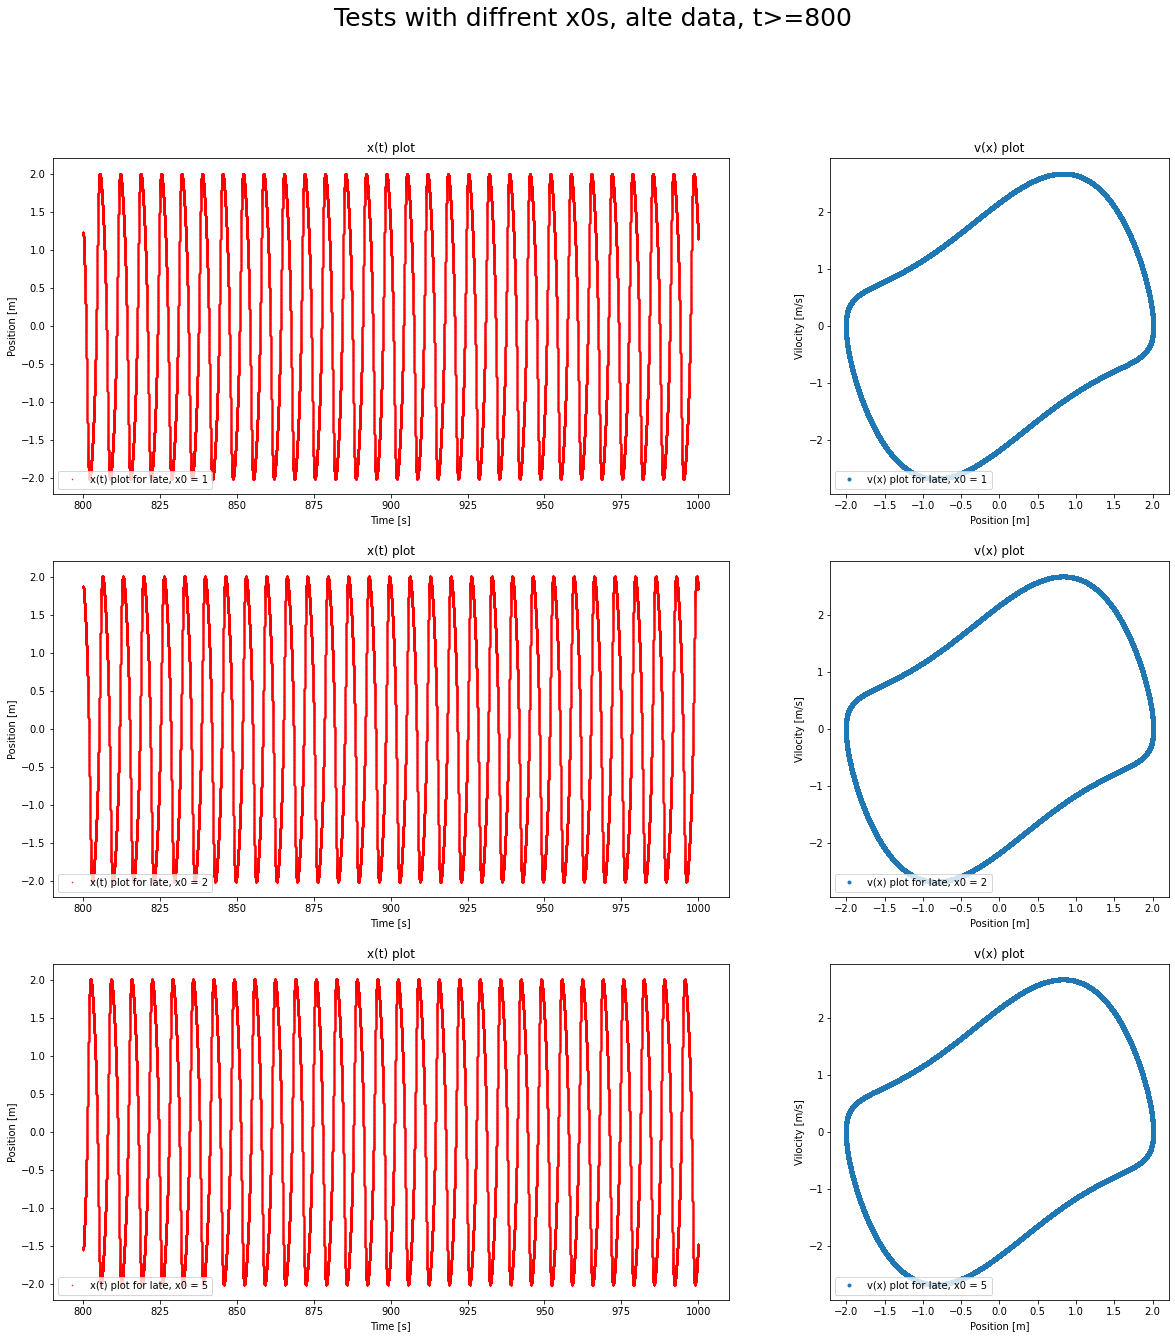

In [24]:
VisVanPol([x01late,x02late,x05late],["late, x0 = 1","late, x0 = 2","late, x0 = 5"], "Tests with diffrent x0s, alte data, t>=800")

### Part 3
Its clear to see that this oscialltor at some point stabilizes at a set place, which means that nomatter the starting potition, the resulting oscillation will eventually become identical to other starting positions, assuming nothing else changed.

This is diffrent than the unharmonic oscialltor seen back in 2.b, since the starting postion of that one largely determined the resulting oscialltion. We can also see that for our Van der Pol oscillator, the phase plot (v(x)) also results in a some repeated pattern, as just like the unharmonic oscilaltor, the vilocity reaches 0 at the max points (-2 and 2), but differs in that it doesnt reach some max vilocity at x = 0. The weird shape is due to the dampening, energy isnt being added at a constant rate, like with the unharmonic oscillator, but is rather being siphoned in and out of the system depending on the height of the oscillation.

## 3.b
We will now look at some diffrent values for mu, and also plot that in much the same way as we did for 3.a. We will use mu = 7 this time, and look at the diffrences, for that we will need a new fucntion to throw into our solve function, but that is easy to make sicne we just repeat what we did for 3.a.

In [25]:
def VanPolOscMu7(time:float, xv:list, omega = 1, mu = 7) -> (float, float): #I only chnaged mu = 7, everytign else is identical to ValPolOsc
    dxdt = xv[1]
    dvdt = -mu*(xv[0]**2-1)*xv[1]-omega**2*xv[0]
    return dxdt, dvdt

In [26]:
%%time
#Sit back and relax... this will take a while, upwards of 4 minutes
x01txvmu7 = SolveVanPol(VanPolOscMu7,1)
x02txvmu7 = SolveVanPol(VanPolOscMu7,2)
x05txvmu7 = SolveVanPol(VanPolOscMu7,5)

Wall time: 3min 51s


We are again only interested in the early and late plots, so let us just separate it right away and plot it.

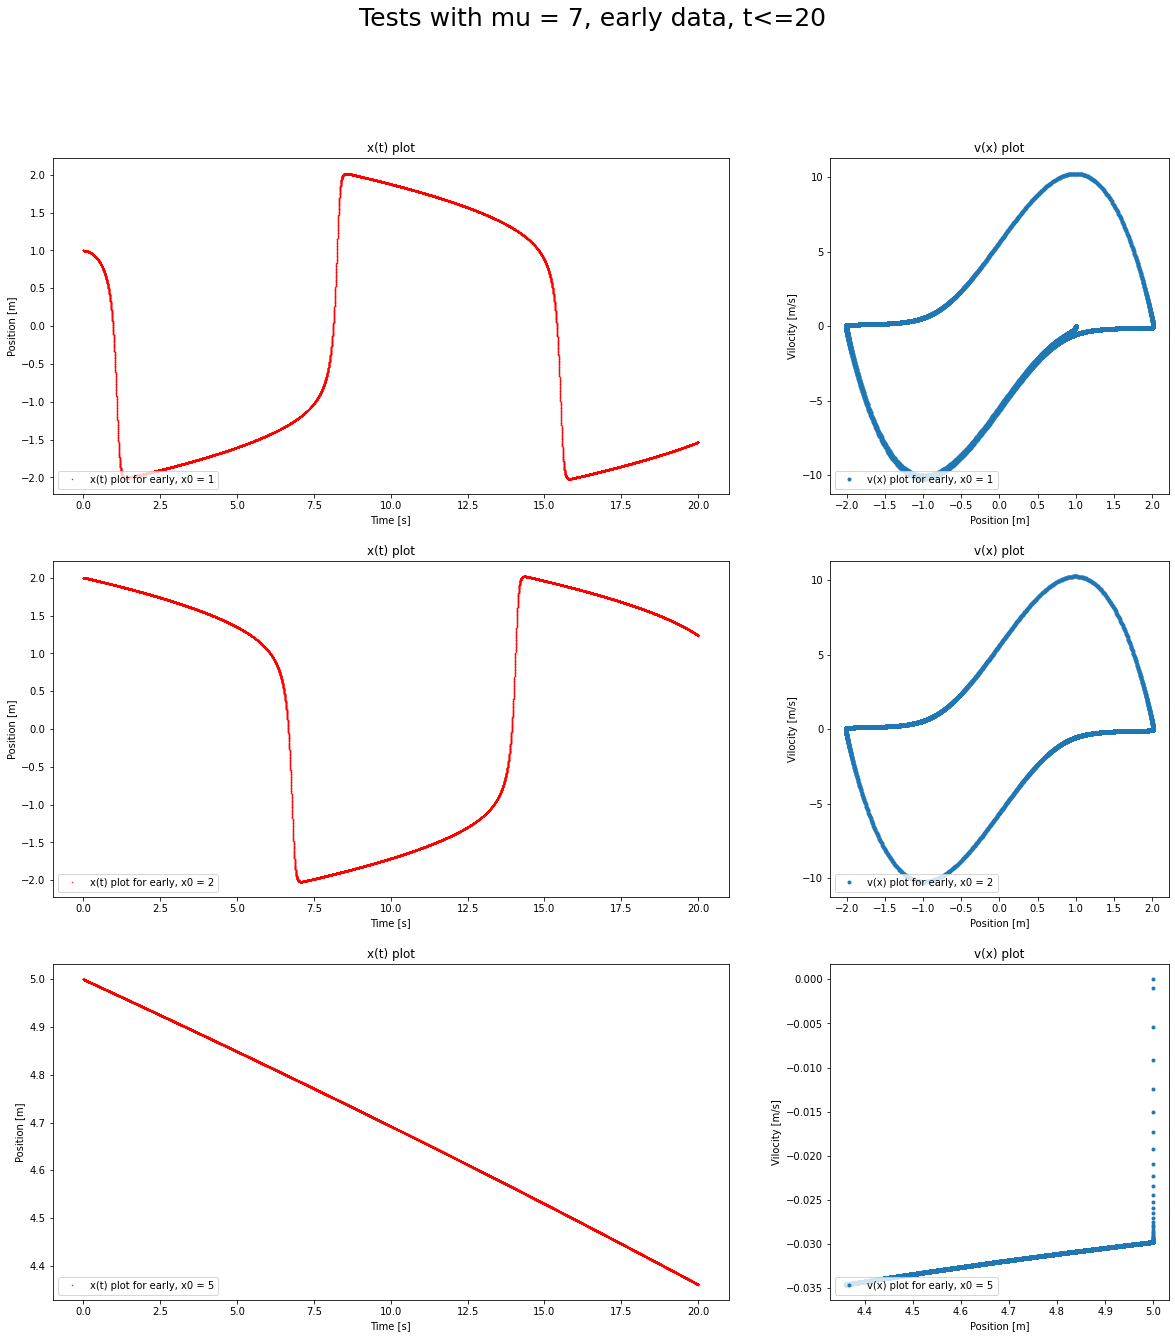

In [27]:
x01mu7 = EarLate(x01txvmu7)
x02mu7 = EarLate(x02txvmu7)
x05mu7 = EarLate(x05txvmu7)
VisVanPol([x01mu7[0],x02mu7[0],x05mu7[0]],["early, x0 = 1","early, x0 = 2","early, x0 = 5"],"Tests with mu = 7, early data, t<=20")

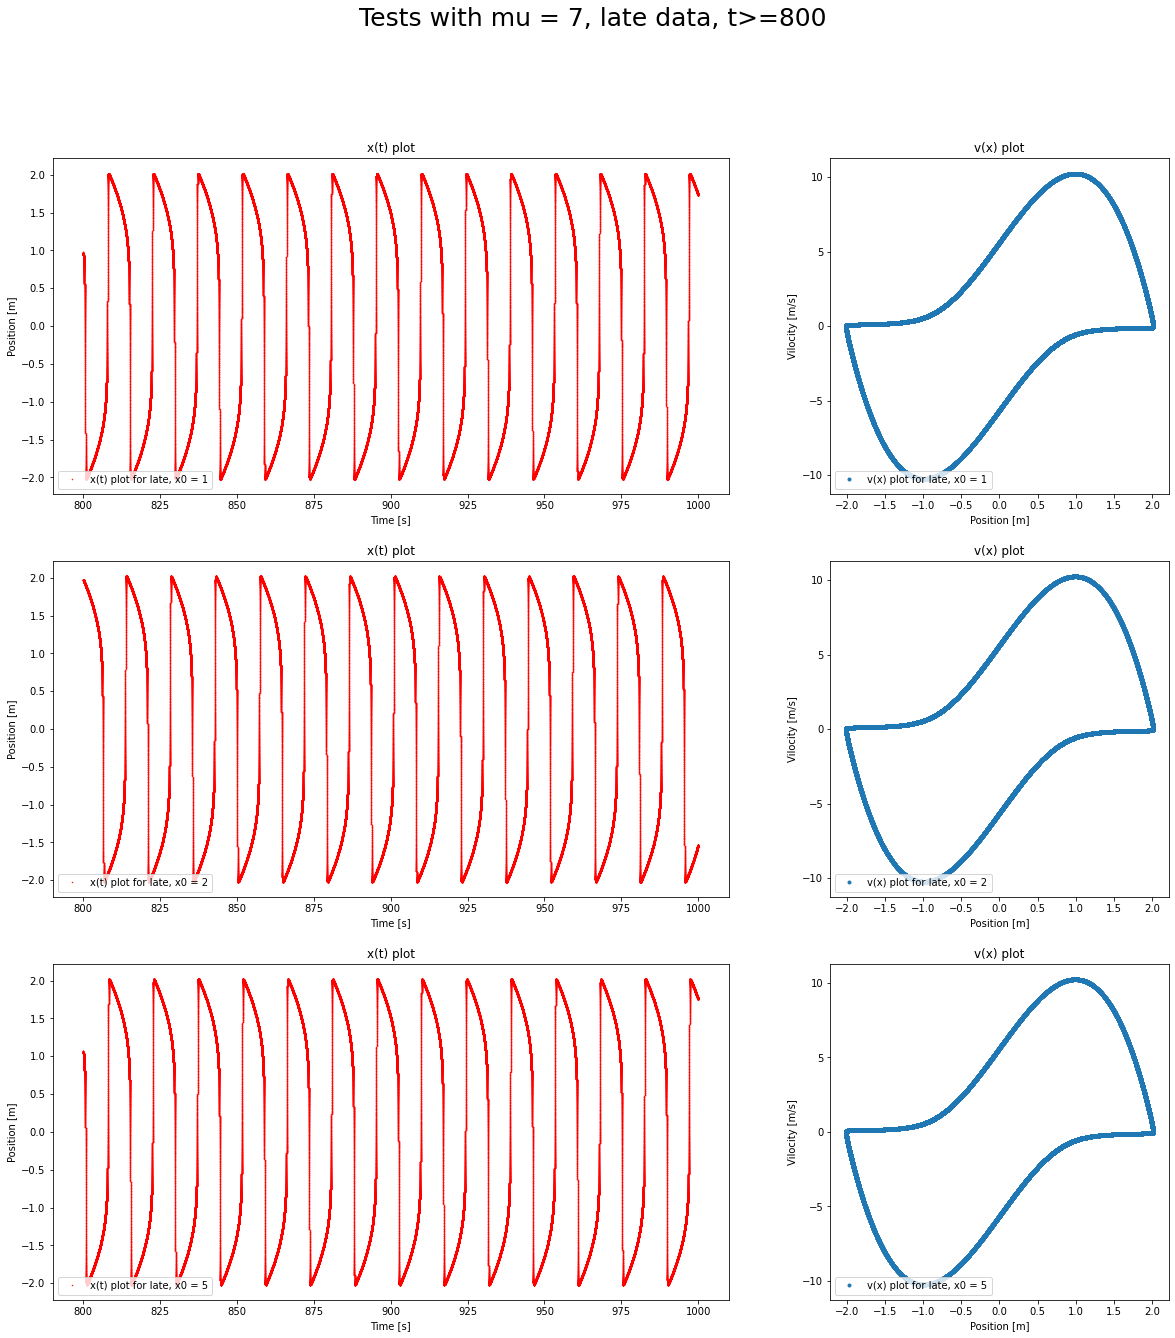

In [28]:
VisVanPol([x01mu7[1],x02mu7[1],x05mu7[1]],["late, x0 = 1","late, x0 = 2","late, x0 = 5"],"Tests with mu = 7, late data, t>=800")

It once again stabilizes at 2 and -2, which suggests that no matter the value $mu$, that will still be the preferred "place to be" so to speak. Which makes sense since the dampening effect removed energy from big oscillations and add energy to small ones, so 2 is just the perfect place where as much energy is being added as it is being removed. The scewing of the v(x) is much more drastic, which makes sense since the dampening effect is now stronger and would therefore effect the speed more because the energy is being siphoned in and out of the system at a much more drastic rate. 

The plot is also now no longer the almost sin or cos like curve we saw for mu = 1, but moreso a series of alternatly flipped identical lines set on a line. This is again due tot he strengh of the dampening, we can clearly see that the line gets thiner around the middle of an oscillation (around x = -1 or 1) signifying that it is being accelerated, and gets much thicker around the endpints (near -2 and 2) signifying that it is now being slowed down. This mirrors what we see on the v(x) plot, where the speed falls drastically when approacing -2 or 2, and then picks up when we are approacing 1 and -1, where it reaches a max. This is because again, due to the energy being pulled and put into the system, when the oscillations are low (0 to 1 or -1) energy gets piled in, accelerating, and when the oscallation is high (1 to 2 and -1 to -2) evergy gets pulled out, deaccelerating.